In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
data=cifar10.load_data()
#df=pd.DataFrame(data)
#df.columns
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, 'train shape')
print(x_test.shape, 'test shape')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

(50000, 32, 32, 3) train shape
(10000, 32, 32, 3) test shape
(50000, 1) train samples
(10000, 1) test samples


In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
len(data[0][0][0][0])

32

In [7]:
len(data[0][0][1])

32

In [8]:
data[0][0][0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

# 3.d Display at least 2 images of each class

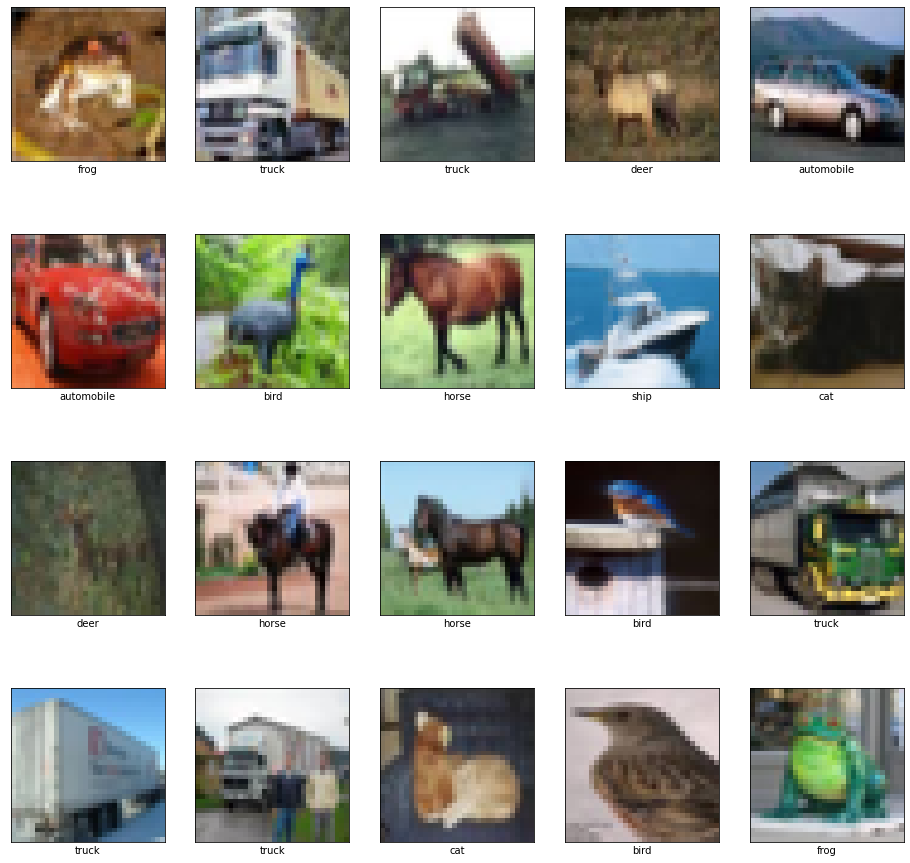

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

# 4 Train a neural network


In [10]:
x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

In [11]:
y_train_df=pd.DataFrame(y_train)
y_test_df=pd.DataFrame(y_test)

In [12]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train_ohe = onehot_encoder.fit_transform(y_train_df)
y_test_ohe = onehot_encoder.fit_transform(y_test_df)
#y_train, y_test = y_train.flatten(), y_test.flatten()

In [13]:
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [15]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding='same', input_shape=(32, 32, 3),activation='step'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same',activation='step'))
model.add(LeakyReLU(0.1))
    
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same',activation='step'))
model.add(LeakyReLU(0.1))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same',activation='step'))
model.add(LeakyReLU(0.1))

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
    
model.add(Dense(256))
model.add(LeakyReLU(0.1))

model.add(Dropout(0.5))
    
model.add(Dense(10))
model.add(Activation("softmax"))

ValueError: Unknown activation function: step. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

In [17]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)        

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='step', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (5,5), activation='step', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (5, 5), activation='step', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='step', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

In [20]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='sigmoid', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (5,5), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (5, 5), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 128)        

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 470s 300ms/step - loss: 2.3098 - accuracy: 0.1014 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 473s 303ms/step - loss: 2.3033 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 468s 300ms/step - loss: 2.3031 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 469s 300ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 476s 305ms/step - loss: 2.3029 - accuracy: 0.1016 - val_loss: 2.3027 - val_accuracy: 0.1000


In [22]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='elu', kernel_initializer='he_uniform', padding='same',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, (5,5), activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256, (5, 5), activation='elu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='elu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 8, 8, 128)        

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 389s 248ms/step - loss: 2.3145 - accuracy: 0.1002 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 336s 215ms/step - loss: 2.3036 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 318s 204ms/step - loss: 2.3031 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 345s 221ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 329s 211ms/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1000


In [24]:
model.compile(optimizer='Ftrl',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 324s 207ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 320s 205ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 353s 226ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 356s 227ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 349s 223ms/step - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000


In [25]:
model.compile(optimizer='Adadelta',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 366s 233ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 351s 225ms/step - loss: 2.3026 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 394s 252ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 480s 307ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 523s 334ms/step - loss: 2.3026 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000


In [26]:
model.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 486s 310ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 477s 305ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 474s 303ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 473s 303ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 472s 302ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000


In [27]:
model.compile(optimizer='Adamax',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 [==============================] - 479s 306ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 482s 308ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 483s 309ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 477s 305ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 479s 307ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000


In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for i in optimizers:
    model.compile(optimizer=i,loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
    result = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=6) 